In [1]:
import pandas as pd
import json

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.patheffects as path_effects
import matplotlib.font_manager as fm
import matplotlib.colors as mcolors
from matplotlib import cm
from highlight_text import fig_text, ax_text
from matplotlib.colors import LinearSegmentedColormap, Normalize
from matplotlib import cm
import matplotlib.gridspec as gridspec

# We'll only use a vertical pitch for this tutorial
from mplsoccer import VerticalPitch
from mplsoccer import FontManager, add_image
from PIL import Image
import urllib
import json
import os

In [3]:
#open json file
with open ('1650617.json', encoding='utf8') as f:
    data = json.load(f)

In [4]:
#access data then access values from key playerIdNameDictionary
values = data['playerIdNameDictionary']

In [5]:
values

{'39722': 'David Alaba',
 '33404': 'Eden Hazard',
 '337782': 'Vinícius Júnior',
 '337879': 'Éder Militão',
 '347862': 'Rodrygo',
 '353423': 'Aurélien Tchouaméni',
 '369109': 'Eduardo Camavinga',
 '14296': 'Karim Benzema',
 '296337': 'Ferland Mendy',
 '31772': 'Toni Kroos',
 '104010': 'Antonio Rüdiger',
 '106875': 'Nacho',
 '106883': 'Daniel Carvajal',
 '137467': 'Marco Asensio',
 '144890': 'Dani Ceballos',
 '238901': 'Jesús Vallejo',
 '317354': 'Álvaro Odriozola',
 '323236': 'Mariano Díaz',
 '403807': 'Lucas Cañizares',
 '430302': 'Diego Piñeiro',
 '345031': 'Andriy Lunin',
 '344644': 'Federico Valverde',
 '98126': 'Ante Budimir',
 '427283': 'Abdessamad Ezzalzouli',
 '84880': 'Darko Brasanac',
 '91194': 'Aitor Fernández',
 '93492': 'Aridane Hernández',
 '96566': 'Juan Cruz',
 '101238': 'Moi Gómez',
 '109349': 'Roberto Torres',
 '118479': 'Rubén Peña',
 '119189': 'Rubén García',
 '131037': 'Unai García',
 '240874': 'David García',
 '249960': 'Lucas Torró',
 '276903': 'Juan Pérez',
 '335

In [6]:
players = [
    {
        'name':'Aurélien Tchouaméni',
        'whoscored_id':'353423',
        'country_id':'fra'
    },
    {
        'name':'Eduardo Camavinga',
        'whoscored_id':'369109',
        'country_id':'fra'
    },
    {
        'name':'Toni Kroos',
        'whoscored_id':'31772',
        'country_id':'ger'
    },
    {
        'name':'Federico Valverde',
        'whoscored_id':'344644',
        'country_id':'uru'
    },
    {
        'name':'Marco Asensio',
        'whoscored_id':'137467',
        'country_id':'spa'
    },
    {
        'name':'Dani Ceballos',
        'whoscored_id':'144890',
        'country_id':'spa'
    },
]

In [7]:
data_list = []
for player in players:
    for d in data['events']:
        try:
            if (d['playerId'] == int(player['whoscored_id'])) & (d['isTouch']):
                data_list.append(d)
        except:
            continue

In [8]:
x_ = [x['x'] for x in data_list]
y_ = [y['y'] for y in data_list]
playerId = [p['playerId'] for p in data_list]

# Inverted because we are using a vertical pitch
data = pd.DataFrame({'y':x_,'x':y_,'playerId':playerId})

In [9]:
data_test = data[data['playerId'] == 344644].reset_index(drop=True)

In [10]:
colors = [
    '#eaddcb',
    '#E1CEB5',
    '#e7d7c3',
    '#dcd3c9',
    '#d4ccc0',
    '#d8d1c6',
    '#c3bfae',
    '#bab9a6',
    '#b0b39e',
    '#a6ad96',
    '#9ba790',
    '#90a18a',
    '#849b84',
    '#789196',
    '#7e9ea4',
    '#7ca2a9',
    '#83b3bc',
    '#70b3bf',
    '#4da3b3',
    '#3490a1',
]
soc_cm = LinearSegmentedColormap.from_list('SOC', colors, N=50)
cm.register_cmap(name='SOC', cmap=soc_cm)

In [11]:
URL1 = ('https://github.com/mifardli/web-development/raw/main/Fonts/Poppins-Light.ttf')
poppins_light = FontManager(URL1)
URL2 = ('https://github.com/mifardli/web-development/raw/main/Fonts/Quicksand-VariableFont_wght.ttf')
quicksand_font = FontManager(URL2)
URL3 = ('https://github.com/mifardli/web-development/raw/main/Fonts/Poppins-Bold.ttf')
poppins_bold = FontManager(URL3)
URL4 = ('https://github.com/mifardli/web-development/raw/main/real-madrid-logo-28365.png')
URL5 = ('https://github.com/mifardli/web-development/raw/main/twitter-logos.png')
URL6 = ('https://github.com/mifardli/web-development/raw/main/laliga-santander-logo-2.png')

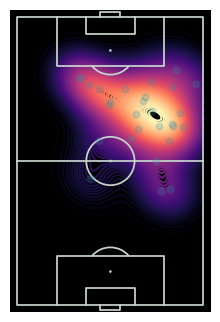

In [12]:
fig = plt.figure(figsize = (4,4), dpi = 100)
ax = plt.subplot(111)
pitch = VerticalPitch(
    pitch_type='opta',
    pitch_color='black',
    goal_type='box',
    linewidth=1.25,
    line_color='#c7d5cc',
)
pitch.draw(ax = ax)

pitch.kdeplot(
    data_test.y, data_test.x, 
    ax=ax, shade=False, 
    levels=100, shade_lowest=True,
    cut=4, zorder=-1, cmap='magma')

ax.scatter(data_test.x, data_test.y, s=20, alpha=0.2, lw=1.5,  color='#3490a1')

In [13]:
def plot_kdetouches(ax, fig, playerId, countryId, playerName, df=data):
    '''
    Plot kde touches for a specific player.
    '''
    data = df.copy()
    data_player = data[data['playerId'] == int(playerId)].reset_index(drop=True)
    total_touches = data_player.shape[0]
    touches_third = data_player[data_player['y'] >= (100*2)/3].shape[0]/total_touches
    pitch = VerticalPitch(
    pitch_type='opta',
    pitch_color='#eaddcb',
    goal_type='box',
    linewidth=1.25,
    line_color='black',
    )
    pitch.draw(ax=ax)

    pitch.kdeplot(
        data_player.y, data_player.x, 
        ax=ax, shade=True, 
        levels=100, shade_lowest=True,
        cut=4, zorder=-1, cmap='SOC')

    ax.scatter(data_player.x, data_player.y, s=10, alpha=0.2, lw=1.5, color='#3490a1')
    # -- Transformation functions
    ax.set_ylim(ax.get_ylim()[0], ax.get_ylim()[1])
    ax.set_xlim(ax.get_xlim()[0], ax.get_xlim()[1])
    DC_to_FC = ax.transData.transform
    FC_to_NFC = fig.transFigure.inverted().transform
    # -- Take data coordinates and transform them to normalized figure coordinates
    DC_to_NFC = lambda x: FC_to_NFC(DC_to_FC(x))
    ax_coords = DC_to_NFC((15,109))
    ax_size = 0.018
    image_ax = fig.add_axes(
        [ax_coords[0], ax_coords[1], ax_size, ax_size],
        fc='None', anchor='C'
    )
    fotmob_url = 'https://images.fotmob.com/image_resources/logo/teamlogo/'
    player_face = Image.open(urllib.request.urlopen(f"{fotmob_url}{countryId}.png"))
    image_ax.imshow(player_face)
    image_ax.axis("off")
    ax_text(
        x=95, y=115,
        s=f'{playerName}\n<touches {total_touches:.0f} | final third: {touches_third:.0%}>',
        highlight_textprops=[{'size':5, 'weight':'normal'}],
        ax=ax,
        size=7,
        fontproperties=poppins_bold.prop,
        color='black',
        ha='left'
    )
    return ax

findfont: Font family ['DM Sans'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Karla'] not found. Falling back to DejaVu Sans.


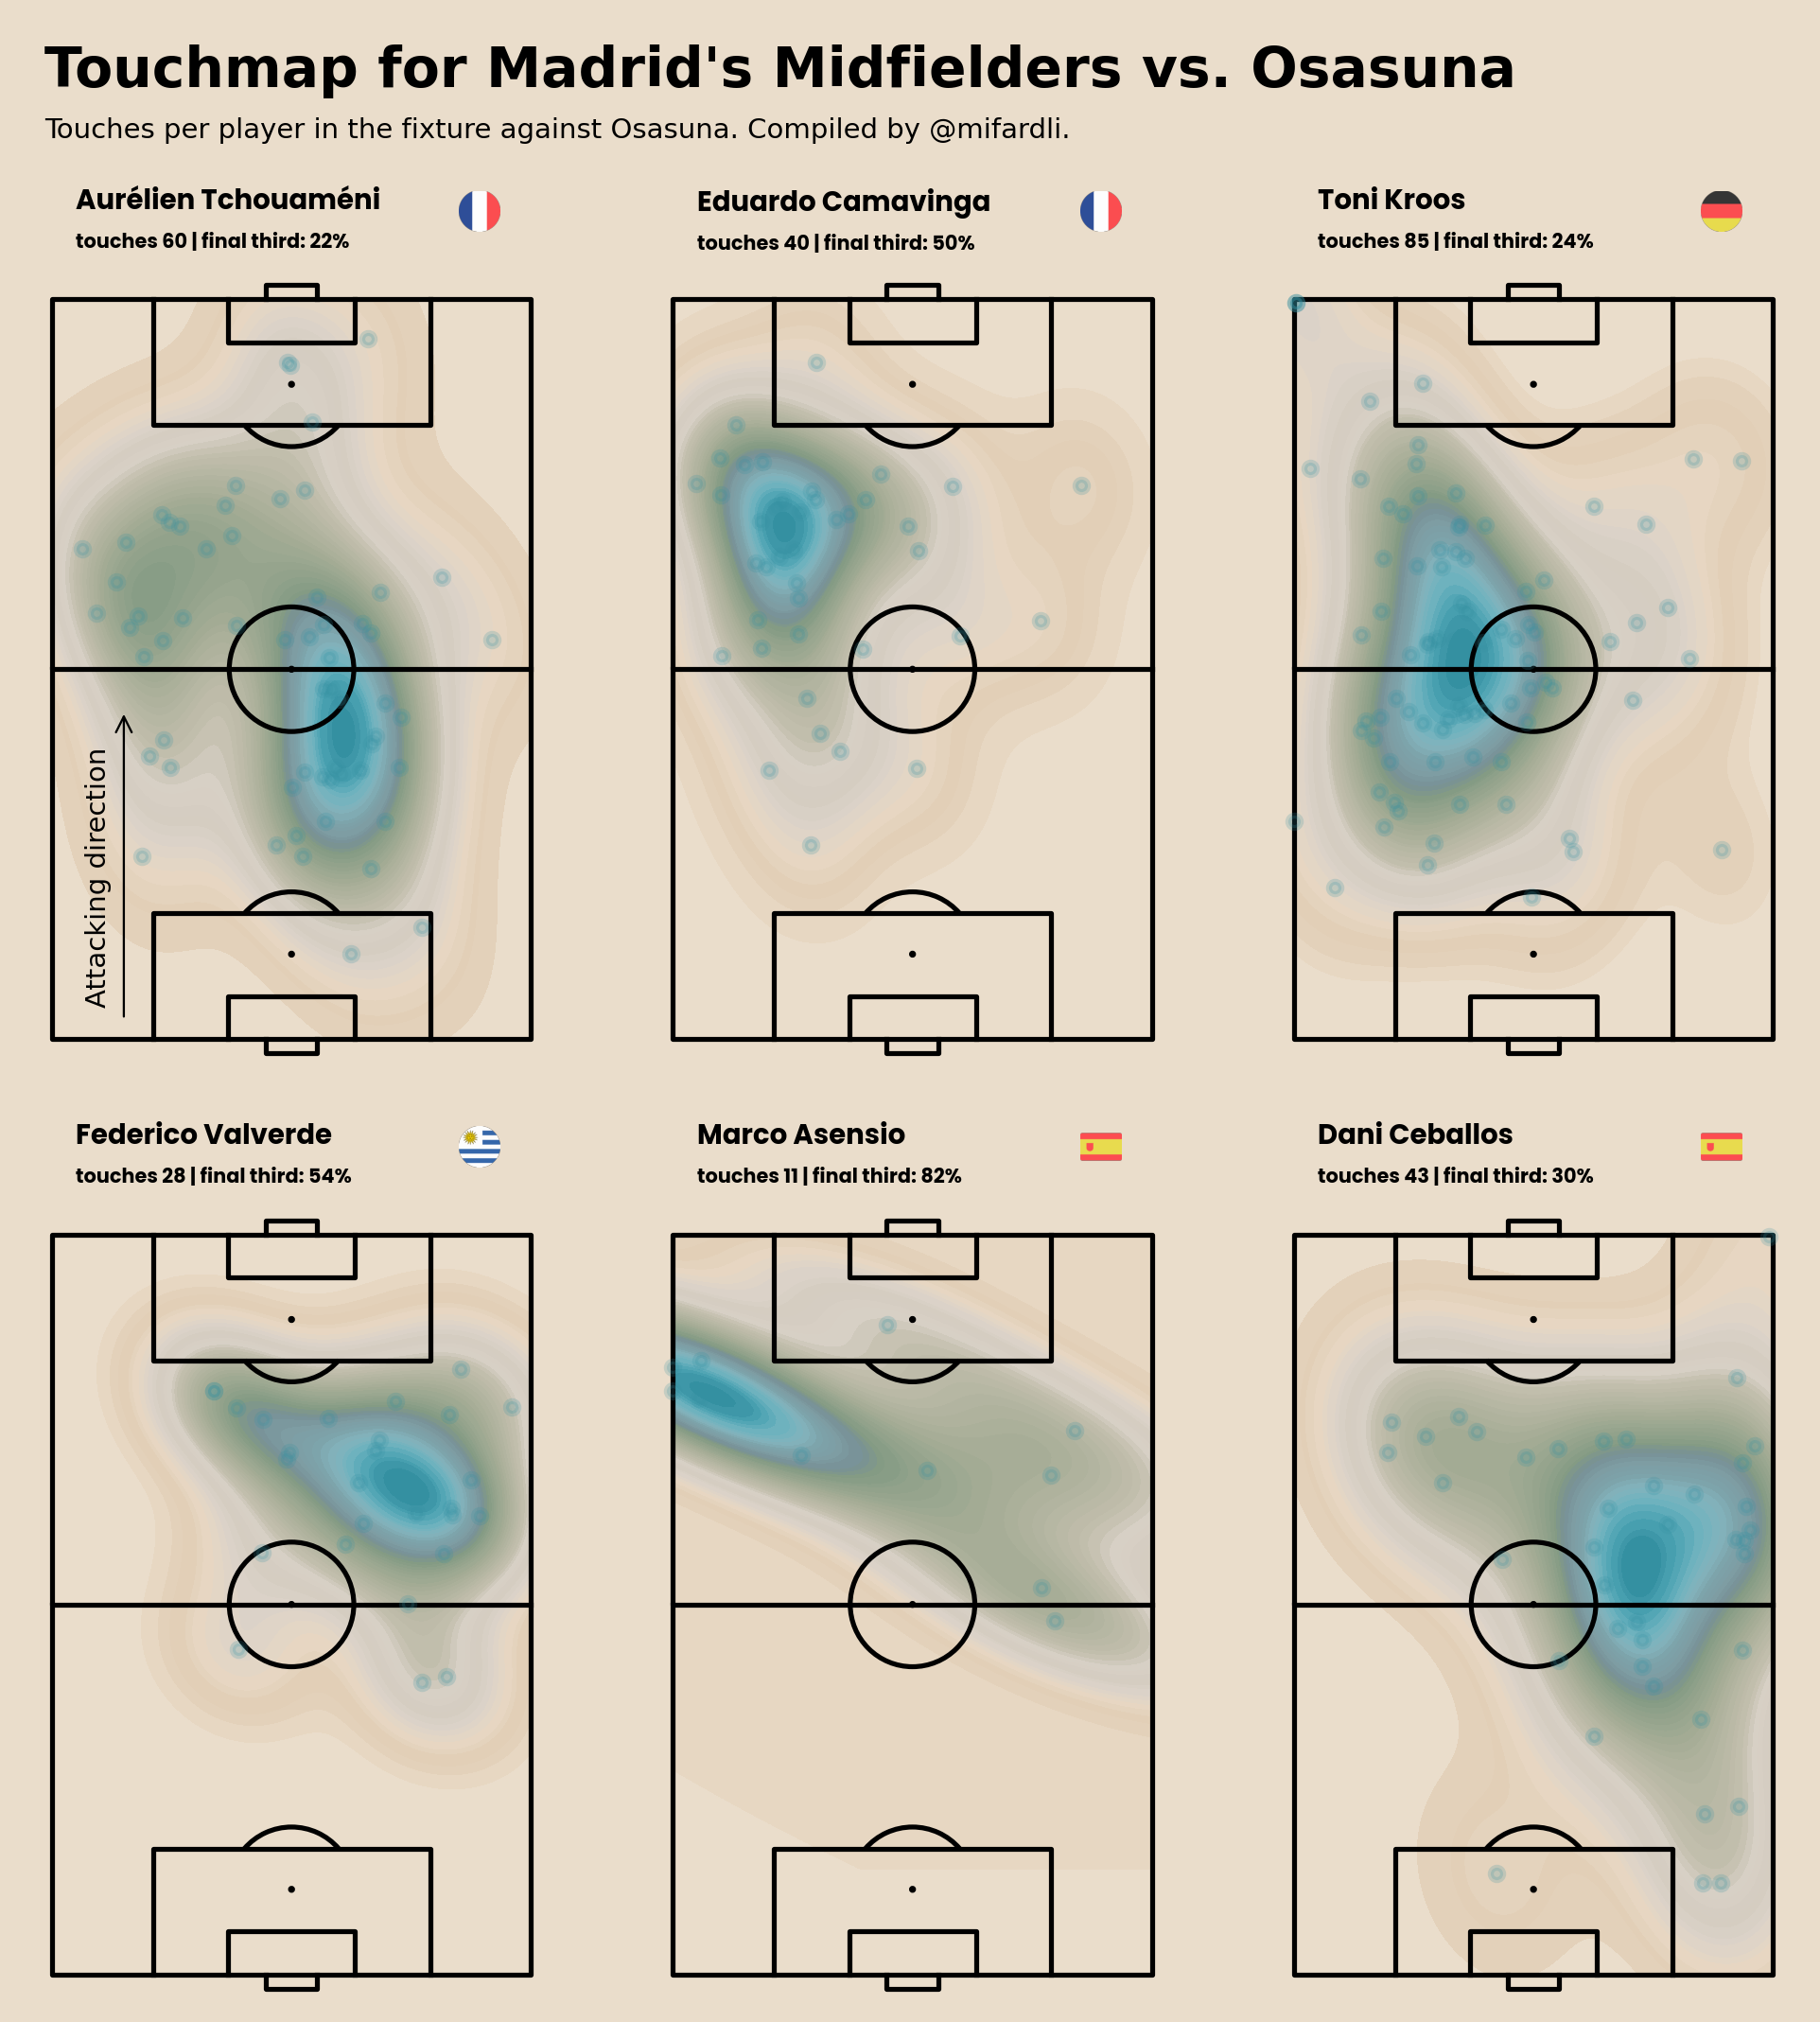

In [14]:
layout_ = '''
    ABC
    DEF
'''

fig = plt.figure(figsize=(8,8), dpi=300)
fig.patch.set_facecolor('#eaddcb')
axs = fig.subplot_mosaic(
    layout_
)

counter = 0
for k, ax in axs.items():
    playerId = players[counter]['whoscored_id']
    countryId = players[counter]['country_id']
    playerName = players[counter]['name']
    plot_kdetouches(ax, fig, playerId, countryId, playerName)
    counter += 1

axs['A'].annotate(
    xy=(93, 5),
    text='Attacking direction',
    rotation=90,
    size=7,
    color='black'
)

axs['A'].annotate(
    xy=(85,2),
    xytext=(85,45),
    text='',
    arrowprops=dict(arrowstyle='<-',linewidth=0.55),
    color='black'
)

fig_text(
    x = 0.13, y = .96, 
    s = "Touchmap for Madrid's Midfielders vs. Osasuna",
    va = "bottom", ha = "left",
    fontsize = 14, font = "DM Sans", weight = "bold"
)
fig_text(
    x = 0.13, y = .94, 
    s = "Touches per player in the fixture against Osasuna. Compiled by @mifardli.",
    va = "bottom", ha = "left",
    fontsize = 7, color = "black", font = "Karla"
)

plt.savefig(
    "output/10032022_madrid_touchestest.png",
    dpi = 600,
    facecolor = "#eaddcb",
    bbox_inches="tight",
    edgecolor="none",
    transparent = False
)

# plt.savefig(
#     "output/09052022_madrid_touches_tr.png",
#     dpi = 600,
#     facecolor = "none",
#     bbox_inches="tight",
#     edgecolor="none",
#     transparent = True
# )